# Solution 4

## FINM 37400 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# 1 HBS Case: The Information Content of the Yield Curve

## 1.1

The Term Spread
* What is the term spread? 
* What is the preferred measure of the term spread in the case?
* What evidence is cited for the term spread's power in predicting recessions?
* Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?

Using the file `yields.xlsx`, calculate the term spread at the end of the sample.
* What does this term spread suggest about economic growth, according to the evidence of Estrella?

## 1.2

Term premia
* What is the term premium? Why is it impossible to get a direct measure of it?
* Explain equations (1) and (2). Why does Sacks think this concept of the term spread complicates the relationship found by Estrella?

## 1.3

Though this case touches on monetary policy, that is not our focus. Rather, our focus is the degree to which the current shape of the yield curve is predictive of future short-term interest rates.

Suppose the term premium is zero. 
* What does a downward-sloping yield curve predict about future short-term rates? 
* In this case, is it risky to hold long-term bonds or short-term bonds? Is this risk compensated?

Suppose the term premium increases 5 percentage points.
* What would change about your previous answer?

***

In [3]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

# 1.1 Solution

The term spread refers to the slope of the yield curve. It is usually calculated as the 10 year treasury yield spread minus the 3 month treasury yield.
A negative term spread has predicted every US recession in about the last 50 years.
The LEVEL of the term spread is what matters most when assessing economic growth.

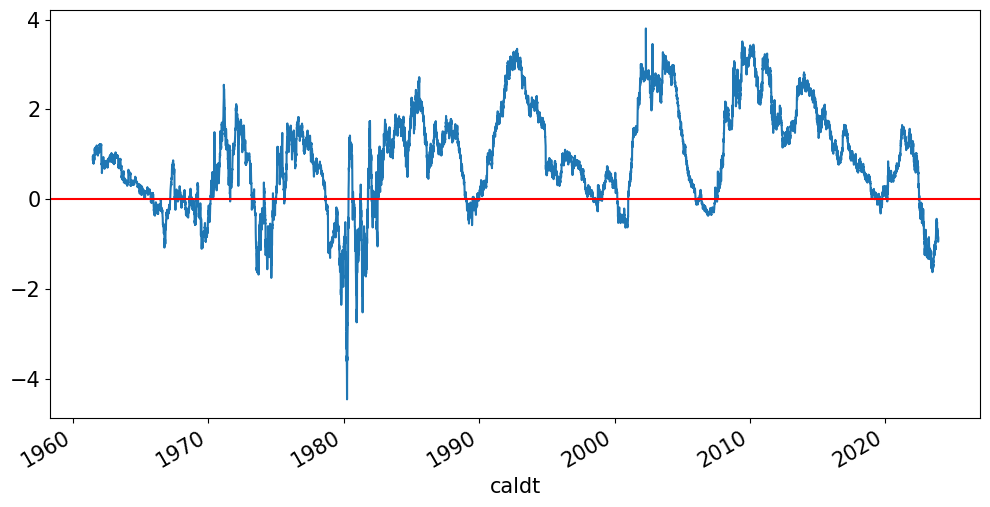

In [6]:
filepath = '/Users/brycehopkins/Library/CloudStorage/OneDrive-TheUniversityofChicago/FINMATH/Fixed Income/finm-fixedincome-2024/data/yields.xlsx'
yields = pd.read_excel(filepath, sheet_name='yields')
yields.set_index('caldt',inplace=True)

TS = yields[10] - yields[1]
ax = TS.plot()
ax.axhline(0, c='r')

Looking at the end of the data, the term spread is negative, thus predicting a recession if the normal trends follow.

# 1.2 Solution

The term premium is the premium that investors demand for investing over a longer time horizon. 

The common explanation for the negative term spread predicting recession is that it reflects the market's forecast of decreasing short-term interest rates due to future economic slowdown.

However, Sacks (and Berner,) are pointing out that the mathematics of yields show there is an extra factor: the term premium, which is a function of the risk premium investors demand for taking on interest-rate risk. Long-term bonds carry interest-rate risk with regard to their short-term valuation. So holding a 10-year bond for 2 years is riskier than holding a 2-year bond for 2 years.

Thus, an inverted yield curve, (i.e. negative term spread,) could be due to a decreasing term premium rather than expected decrease in short rates. A shrinking term premium (risk premium on long term bonds,) is typically associated with a strong market, where risk premia and risk aversion are shrinking.

# 1.3 Solution

If the term premium is 0 and the slope of the yield curve is negative, this says that the market expects future short term rates to fall. It is still risky to hold long term bonds because of interest rate risk, but the market is pricing this as if there is no risk, so it is uncompensated.

If the term premium jumps up to 5%, then the term spread would close by 5 percentage points, without any changes to future short term rates. It is now less risky to hold long term bonds, as the market is now compensating in the form of an extra 5% for interest rate risk (and possibly other risks).

# 2 Calculating Forwards

Use the treasury issues in `'../data/select_maturities_2023-08-31.xlsx`. 

The selected treasuries are at nearly six-month intervals. Approximate that they mature at perfect 6-month intervals. 

In [10]:
filepath = '/Users/brycehopkins/Library/CloudStorage/OneDrive-TheUniversityofChicago/FINMATH/Fixed Income/finm-fixedincome-2024/data/select_maturities_2023-08-31.xlsx'
quotes = pd.read_excel(filepath, sheet_name='selected treasuries').set_index('kytreasno')
quotes

,date,issue date,maturity date,ttm,bid,ask,accrint,ytm,duration,outstanding,cpn rate,instrument
kytreasno,,,,,,,,,,,,
208097,2023-08-31,2023-08-31,2024-02-29,0.498289,97.333194,97.338250,0.000000,0.000148,182.000000,66723,0.000,4
207928,2023-08-31,2022-08-31,2024-08-31,1.002053,97.929688,97.945312,0.000000,0.000145,363.026814,49726,3.250,2
208013,2023-08-31,2023-02-28,2025-02-28,1.497604,99.281250,99.296875,0.000000,0.000139,534.703977,51530,4.625,2
208101,2023-08-31,2023-08-31,2025-08-31,2.001369,100.234375,100.269531,0.000000,0.000132,704.689328,49666,5.000,2
207676,2023-08-31,2021-02-28,2026-02-28,2.496920,90.265625,90.296875,0.000000,0.000126,907.180690,74214,0.500,2
207759,2023-08-31,2021-08-31,2026-08-31,3.000684,89.500000,89.523438,0.000000,0.000123,1085.093032,68664,0.750,2
207845,2023-08-31,2022-02-28,2027-02-28,3.496235,91.695312,91.718750,0.000000,0.000121,1240.082921,62080,1.875,2
207930,2023-08-31,2022-08-31,2027-08-31,4.000000,95.390625,95.414062,0.000000,0.000119,1382.439796,50858,3.125,2
208015,2023-08-31,2023-02-28,2028-02-29,4.498289,98.710938,98.718750,0.000000,0.000117,1518.888512,52769,4.000,2


## 2.1 
Bootstrap the discount factor. 

Plot the answer in terms of discount factors and discount rates.

#### Simplification 
Though the time-to-maturity (ttm) is not spaced exactly at 6 months, for the purposes of this problem, you are welcome to approximate that they are spaced at exact 6-month intervals.


## 2.2
Calculate and plot the forward discount factors from $T$ to $T+0.5$, ranging $T$ from 0.5 through 9.5.


## 2.3
Use the forward discount factors to calculate the `semiannually` compounded forward **rates**.

Plot the curve.

Also report the forward-rate values from 

* $T_1=0.5$ to $T_2=1$.
* $T_1=9.5$ to $T_2=10$.

## 2.4
Explain how an FRA between $T_1$ and $T_2$ would function. 

***

# 2.1 Solution

In [12]:
QUOTE_DATE = '2023-08-31'
t_date = pd.to_datetime(QUOTE_DATE)


CF = pd.DataFrame(data=0, index=quotes.index, columns=quotes['maturity date'])

for i in quotes.index:
    coupon_dates = get_coupon_dates(t_date,pd.to_datetime(quotes.loc[i,'maturity date']))

    if coupon_dates is not None:
        CF.loc[i,coupon_dates] = quotes.loc[i,'cpn rate']/2

    CF.loc[i,quotes.loc[i,'maturity date']] += 100

CF = CF.resample('m',axis=1).sum()
CF.drop(columns=CF.columns[(CF==0).all()],inplace=True)
CF = CF.fillna(0).sort_index(axis=1)
CF

maturity date,2024-02-29,2024-08-31,2025-02-28,2025-08-31,2026-02-28,2026-08-31,2027-02-28,2027-08-31,2028-02-29,2028-08-31,2029-02-28,2029-08-31,2030-02-28,2030-08-31,2031-02-28,2031-08-31,2032-02-29,2032-08-31,2033-02-28,2033-08-31
kytreasno,,,,,,,,,,,,,,,,,,,,
208097,100.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207928,1.6250,101.6250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208013,2.3125,2.3125,102.3125,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208101,2.5000,2.5000,2.5000,102.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207676,0.2500,0.2500,0.2500,0.2500,100.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207759,0.3750,0.3750,0.3750,0.3750,0.3750,100.3750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207845,0.9375,0.9375,0.9375,0.9375,0.9375,0.9375,100.9375,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
207930,1.5625,1.5625,1.5625,1.5625,1.5625,1.5625,1.5625,101.5625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
208015,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,102.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


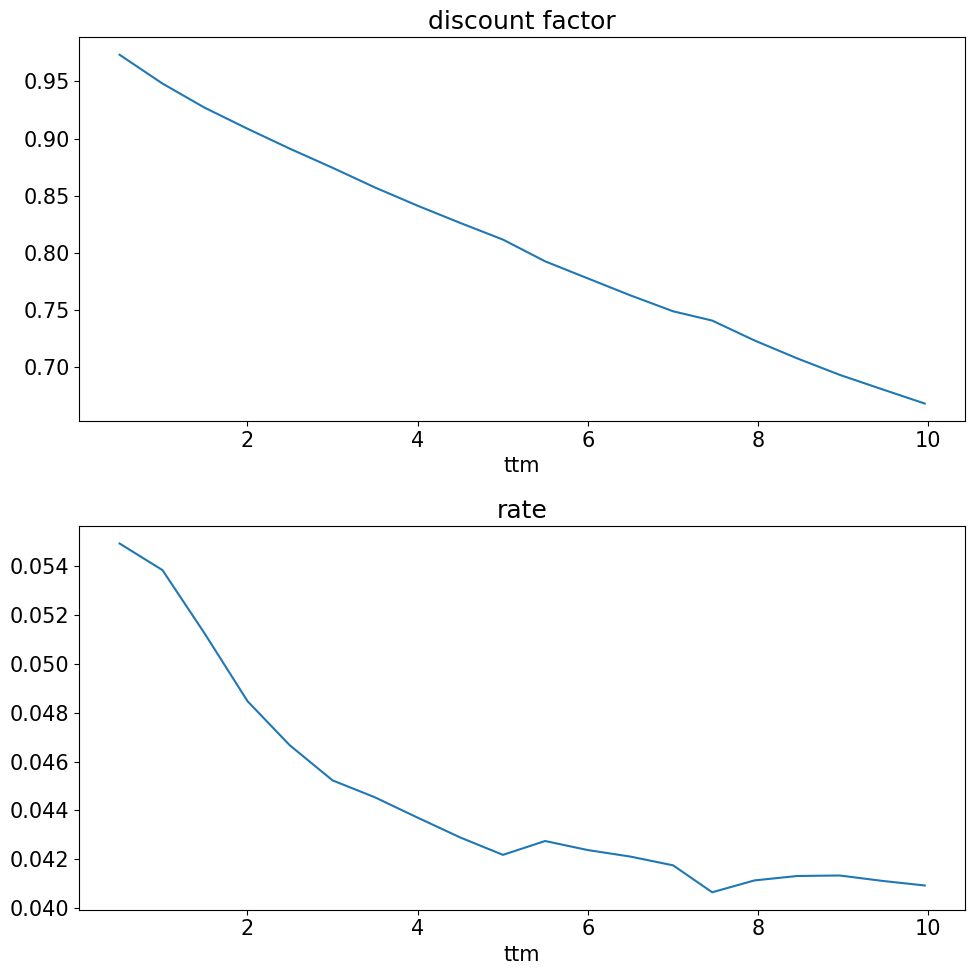

In [16]:
quotes['price'] = (quotes['bid'] + quotes['ask'])/2

COMPOUNDING = 2
spot = pd.DataFrame(np.linalg.solve(CF,quotes['price'].loc[CF.index]), index=CF.index, columns=['discount factor'])
spot.insert(0,'ttm',quotes['ttm'])
spot = spot.reset_index().set_index('ttm')
spot['rate'] = discount_to_intrate(spot['discount factor'], spot.index,n_compound=COMPOUNDING)

fig, ax = plt.subplots(2,1,figsize=(10,10))
spot['discount factor'].plot(ax=ax[0],title='discount factor')
spot['rate'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()

# 2.2 Solution

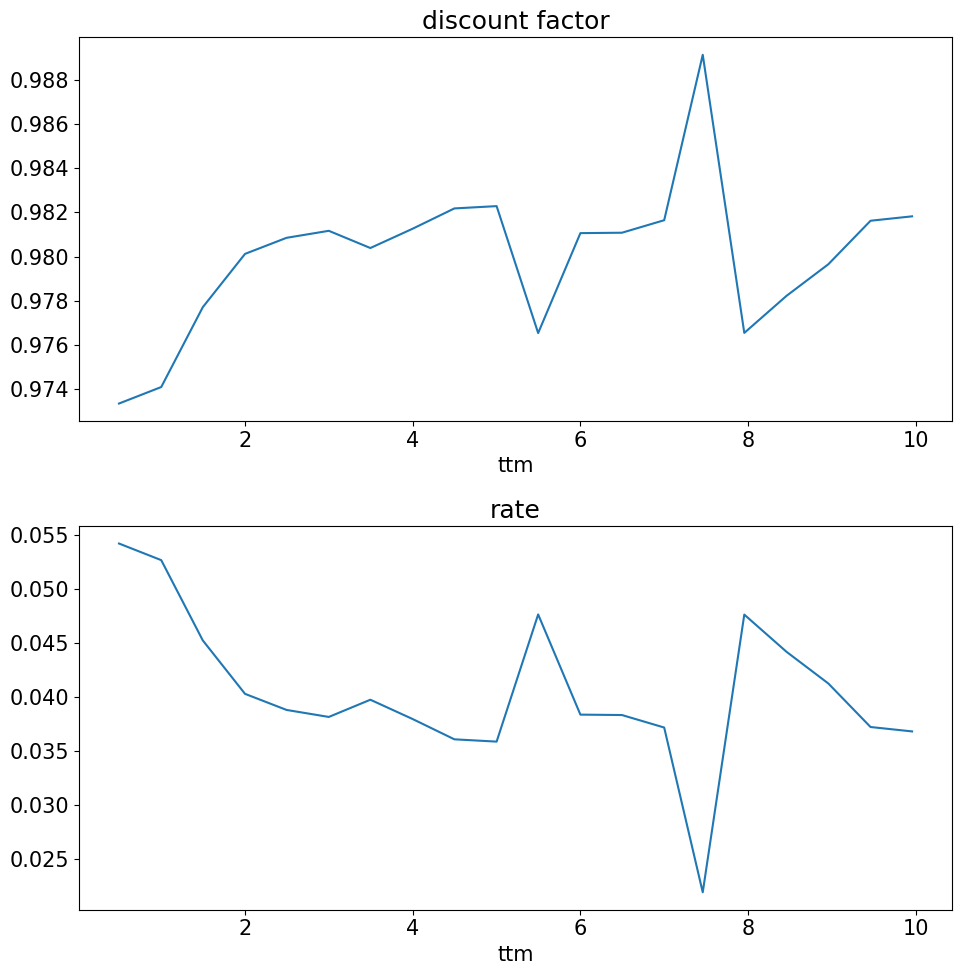

In [17]:
forward = pd.DataFrame(spot['discount factor']/spot['discount factor'].shift(),index=spot.index, columns=['discount factor'])
forward['discount factor'].iloc[0] = spot['discount factor'].iloc[0]
forward['rate'] = -np.log(forward['discount factor']) / forward.index.to_series().diff().mean()

fig, ax = plt.subplots(2,1,figsize=(10,10))
forward['discount factor'].plot(ax=ax[0],title='discount factor')
forward['rate'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()

# 2.3 Solution

The forward rates are plotted in 2.2

In [19]:
T2list = [1,10]
for T2 in T2list:
    forwardrate = forward['rate'].iloc[int(T2*2)-1]
    print(f'The Forward Rate at {T2-.5} to {T2} is {forwardrate:.2%}')

The Forward Rate at 0.5 to 1 is 5.27%
The Forward Rate at 9.5 to 10 is 3.69%


# 2.4 Solution

The FRA would have contract parameters for...
* the notional amount
* the dates $T_1$ and $T_2$
* the floating rate index that will be paid to the counterparty, $index$

Given that, the counterparties would agree on a forward rate for the exchange of the payment,
$$N\kappa[r_n(T_1,T_2)-f_n(t,T_1,T_2)]$$
where
* $\kappa$ is the fraction of year covered by $T_2-T_1$.
* $N$ is the notional amount.

This fixed forward rate, $f_n(t,T_1,T_2)$ is what is calculated above. 

All the rates above assume $T_2 = T_1 + 0.5$.